Max Pauly - Fetch Rewards Data Analyst Assessment

First: Review Existing Unstructured Data and Diagram a New Structured Relational Data Model

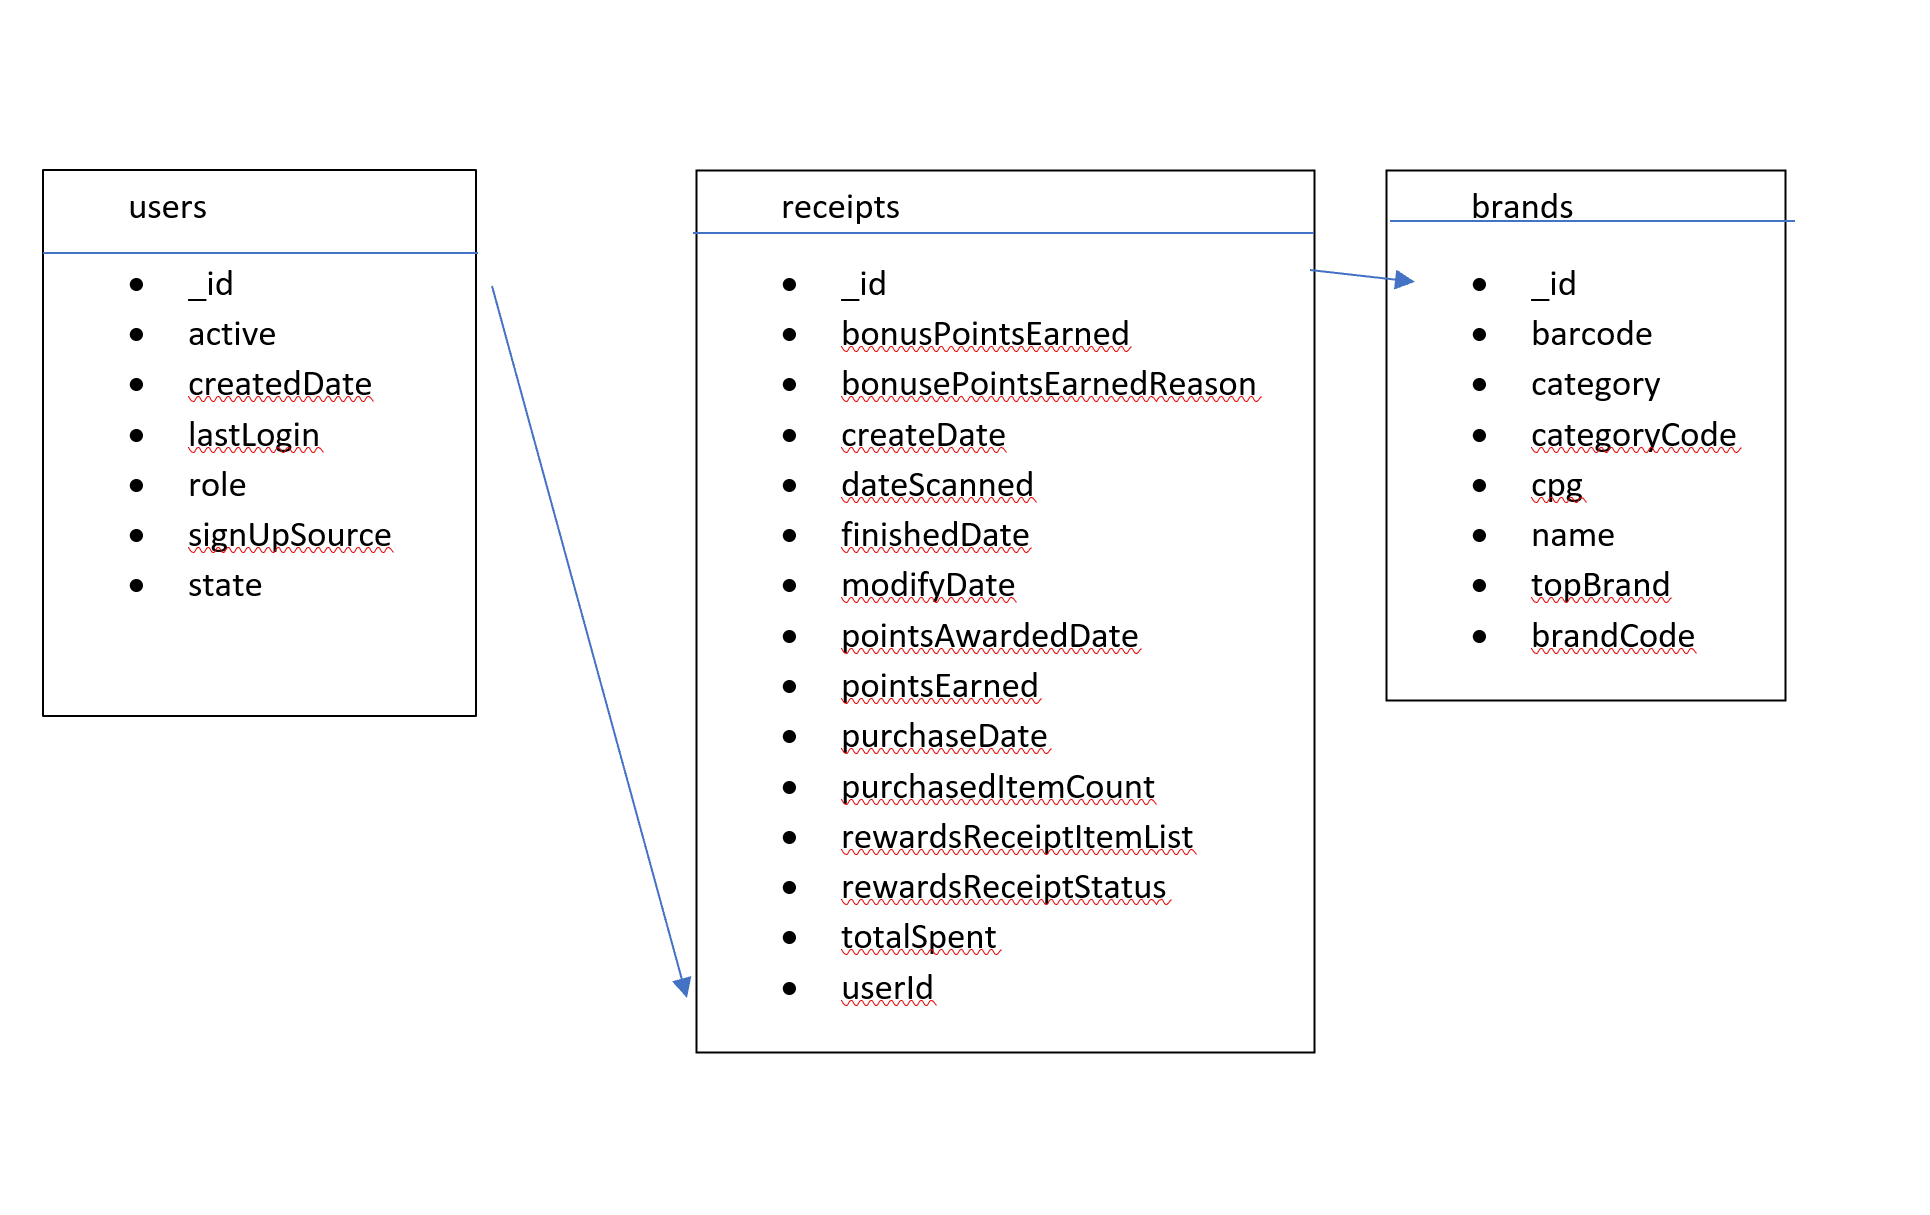

Second: Write a query that directly answers a predetermined question from a business stakeholder

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline

In [29]:
    receipts = pd.read_json(
        "receipts.json.gz",
        lines=True,
        compression='gzip'
    )
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [75]:
receipts['_id'] = receipts['_id'].apply(pd.Series)
receipts['createDate'] = receipts['createDate'].apply(pd.Series)
receipts['dateScanned'] = receipts['dateScanned'].apply(pd.Series)
receipts['finishedDate'] = receipts['finishedDate'].apply(pd.Series)
receipts['modifyDate'] = receipts['modifyDate'].apply(pd.Series)
receipts['pointsAwardedDate'] = receipts['pointsAwardedDate'].apply(pd.Series)
receipts['purchaseDate'] = receipts['purchaseDate'].apply(pd.Series)
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(pd.Series)
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(pd.Series)

In [105]:
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,NaN,1609687536000,NaN,500.0,NaN,5.0,NaN,FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",1609687483000,1609687483000,NaN,1609687488000,NaN,150.0,NaN,2.0,NaN,FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,1609687537000,1609687537000,NaN,1609687542000,NaN,5.0,NaN,1.0,NaN,REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,1609687534000,1609687534000,NaN,1609687539000,NaN,5.0,NaN,4.0,NaN,FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,1609687506000,1609687506000,NaN,1609687511000,NaN,5.0,NaN,2.0,NaN,FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


,$date
0,1609687531000
1,1609687483000
2,1609687537000
3,1609687534000
4,1609687506000


In [36]:
    users = pd.read_json(
        "users.json.gz",
        lines=True,
        compression='gzip'
    )
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [39]:
users['_id'] = users['_id'].apply(pd.Series)
users['createdDate'] = users['createdDate'].apply(pd.Series)
users['lastLogin'] = users['lastLogin'].apply(pd.Series)
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,1609687444800,NaN,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,1609687444800,NaN,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,1609687444800,NaN,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,1609687530554,NaN,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,1609687444800,NaN,consumer,Email,WI


In [37]:
    brands = pd.read_json(
        "brands.json.gz",
        lines=True,
        compression='gzip'
    )
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [41]:
brands['_id'] = brands['_id'].apply(pd.Series)
brands['cpg'] = brands['cpg'].apply(pd.Series)
brands['cpg'] = brands['cpg'].apply(pd.Series)
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,601ac114be37ce2ead437550,test brand @1612366101024,0.0,NaN
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,5332f5fbe4b03c9a25efd0ba,Starbucks,0.0,STARBUCKS
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,601ac142be37ce2ead437559,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,601ac142be37ce2ead437559,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,5332fa12e4b03c9a25efd1e7,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [77]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [78]:
brands.to_sql('brands', con=engine)

In [109]:
users.to_sql('users1', con=engine)


In [82]:
receipts.to_sql('receipts1', con=engine)

In [83]:
pd.read_sql_table('users1', engine).columns

Index(['index', '_id', 'active', 'createdDate', 'lastLogin', 'role',
       'signUpSource', 'state'],
      dtype='object')

In [85]:
pd.read_sql_table('receipts1', engine).columns

Index(['index', '_id', 'bonusPointsEarned', 'bonusPointsEarnedReason',
       'createDate', 'dateScanned', 'finishedDate', 'modifyDate',
       'pointsAwardedDate', 'pointsEarned', 'purchaseDate',
       'purchasedItemCount', 'rewardsReceiptItemList', 'rewardsReceiptStatus',
       'totalSpent', 'userId'],
      dtype='object')

In [100]:
pd.read_sql_table('brands', engine).columns

Index(['index', '_id', 'barcode', 'category', 'categoryCode', 'cpg', 'name',
       'topBrand', 'brandCode'],
      dtype='object')

In [111]:
q3 = pd.read_sql_query("SELECT rewardsReceiptStatus, sum(purchasedItemCount) as totPurchased, avg(totalSpent) as averageSpend\
            FROM receipts1 \
            WHERE rewardsReceiptStatus = 'FINISHED' OR rewardsReceiptStatus = 'REJECTED'\
            GROUP BY rewardsReceiptStatus", engine)
q3

,rewardsReceiptStatus,totPurchased,averageSpend
0,FINISHED,8184.0,80.854305
1,REJECTED,173.0,23.326056


When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater? Average Spend is greater on Finished Receipt Status compared to Rejected Status.
When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater? The total number of items purchased for Finished status was 8,184 which was much greater than the 173 items of the Rejected Status. 

Third: Evaluate Data Quality Issues in the Data Provided

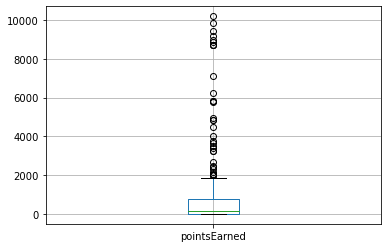

In [112]:
receipts.boxplot(column='pointsEarned')

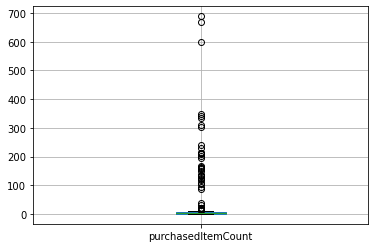

In [113]:
receipts.boxplot(column='purchasedItemCount')

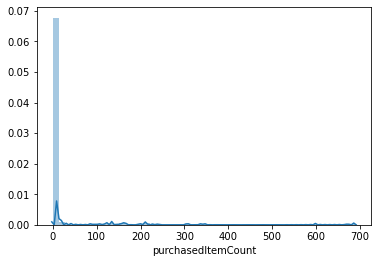

In [117]:
import seaborn as sns
sns.distplot(receipts['purchasedItemCount'], kde=True)

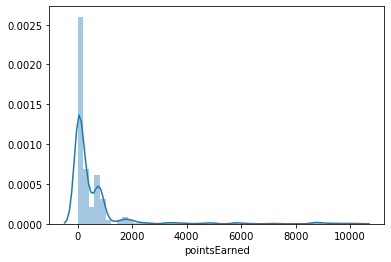

In [118]:
sns.distplot(receipts['pointsEarned'], kde=True)

Based on the above plots, there are definitely outliers from transcations that are skewing the data higher than it actually is

Fourth: Communicate with Stakeholders


Dear Business Leader,

Hi- I was reviewing our Sales Data and comparing it to our points earned data and have a few questions. Is it normal for a small percentage of our transactions to be over 100 units each? And is it normal for our points earned to show an even more skewed pattern? I found some of these issues by plotting out the distributions of each and identified a few abnormalities. I would like to know more about what our ideal points per transaction and units per transaction typically is. I would also like to know what kind of promotions we have been running recently and see if there is any correlation to what I am seeing. Ideally, we can take these factors into account and scale our modeling accordingly. 

Thanks,
Max Pauly